In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
def f(x):
    return x

Try a basic widget

In [5]:
interact(f, x=0)

interactive(children=(Text(value='string', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

Now let's try a widget with an argument 

In [42]:
def interact_with(obj, x):
    print(obj)
    interact(f, x=x)

In [44]:
interact_with('a', x=10)

a


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

Now a widget where the called function actually uses the argument

In [58]:
def g(dat, x):
    print("dat={dat} from inside g")
    return dat

In [59]:
from functools import partial, update_wrapper

def wrapped_partial(func, *args, **kwargs):
    partial_func = partial(func, *args, **kwargs)
    update_wrapper(partial_func, func)
    return partial_func

g_plus_dat = wrapped_partial(g, dat='a')

In [60]:
interact(g_plus_dat, x=10)

ValueError: cannot find widget or abbreviation for argument: 'dat'

In [ ]:
def interact_with_function_using(obj, x):
    function = wrapped_partial(g, dat=obj)
    interact(function, x=x)

In [48]:
interact(f_plus_datobj='a', x=10)

ValueError: cannot find widget or abbreviation for argument: 'dat'

In [6]:
ds = xr.tutorial.open_dataset('air_temperature')
da = ds['air']
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [25]:
all_times = list(str(val) for val in da.coords['time'].values)

In [22]:
def plot_da(time):
    ds = xr.tutorial.open_dataset('air_temperature')['air']
    da_slice = da.sel(time=time, method='nearest')
    return da_slice.plot()

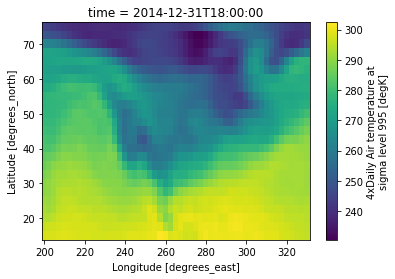

In [23]:
plot_da(time='2014-12-31T18:00:00')

In [11]:
from traittypes import Dataset, DataArray

In [32]:
from functools import partial, update_wrapper

def wrapped_partial(func, *args, **kwargs):
    partial_func = partial(func, *args, **kwargs)
    update_wrapper(partial_func, func)
    return partial_func

In [21]:
interact(plot_slice, time=all_times)

interactive(children=(Dropdown(description='time', options=('2013-01-01T00:00:00.000000000', '2013-01-01T06:00…

<function __main__.plot_slice(time)>

In [29]:
def plot_slice(da, time):
    da_slice = da.sel(time=time, method='nearest')
    return da_slice.plot()

In [39]:
def xr_interactive_plot(da, time):
    print(da)
    f = wrapped_partial(plot_slice, da=da)
    print(f)
    interact(f, time=all_times)

In [40]:
xr_interactive_plot(da, time=all_times)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]
functools.partial(<function plot_slice at 0x7fedd9e82b00>, da=<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 32

ValueError: cannot find widget or abbreviation for argument: 'da'